<a href="https://colab.research.google.com/github/alysson050/PrimeiraAtividadePython/blob/main/Profissao_Cientista_de_Dados_M13_Projeto_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [9]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv (2).csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [10]:
#Seu código aqui para a média
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()

# Mostrar os resultados formatados
print("Média de Preco_Normal por Categoria:")
print(media_por_categoria.round(2).sort_values(ascending=False))

Média de Preco_Normal por Categoria:
Categoria
comidas-preparadas            3095.04
lacteos                       2385.22
congelados                    2108.04
belleza-y-cuidado-personal    1783.56
frutas                        1724.47
verduras                      1343.30
instantaneos-y-sopas           765.49
Name: Preco_Normal, dtype: float64


In [11]:
#Seu código aqui para a mediana
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()

# Mostrar os resultados formatados
print("\nMediana de Preco_Normal por Categoria:")
print(mediana_por_categoria.sort_values(ascending=False))


Mediana de Preco_Normal por Categoria:
Categoria
comidas-preparadas            3290.0
belleza-y-cuidado-personal    1569.0
congelados                    1519.0
frutas                        1195.0
verduras                      1180.0
lacteos                        989.0
instantaneos-y-sopas           439.0
Name: Preco_Normal, dtype: float64


Digite aqui as categorias:
categorias = [
    "lacteos",
    "belleza-y-cuidado-personal",
    "congelados",
    "frutas",
    "verduras",
    "comidas-preparadas",
    "instantaneos-y-sopas"
]

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [12]:
#Seu código aqui

estatisticas = df.groupby('Categoria')['Preco_Normal'].agg(['std', 'mean', 'median'])

# Renomear colunas para melhor visualização
estatisticas = estatisticas.rename(columns={
    'std': 'Desvio_Padrão',
    'mean': 'Média',
    'median': 'Mediana'
})

# Ordenar pelo maior desvio padrão
estatisticas = estatisticas.sort_values('Desvio_Padrão', ascending=False)


print("Estatísticas por Categoria (ordenadas por maior desvio padrão):")
display(estatisticas.round(2))

Estatísticas por Categoria (ordenadas por maior desvio padrão):


,Desvio_Padrão,Média,Mediana
Categoria,,,
lacteos,3925.82,2385.22,989.0
belleza-y-cuidado-personal,2210.04,1783.56,1569.0
congelados,2111.54,2108.04,1519.0
comidas-preparadas,2019.91,3095.04,3290.0
frutas,1639.15,1724.47,1195.0
instantaneos-y-sopas,1170.23,765.49,439.0
verduras,1012.70,1343.30,1180.0


As categorias lacteos e belleza-y-cuidado-personal apresentam a maior diferença entre média e mediana, sugerindo que:

Existem alguns produtos com preços muito elevados.

A maioria dos produtos tem preços mais baixos, mas alguns poucos itens premium puxam a média para cima

Isso é particularmente evidente na categoria lacteos, onde a média é mais que o dobro da mediana, indicando uma distribuição assimétrica à direita com alguns produtos muito caros.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

O boxplot revela a distribuição dos preços e descontos no dataset, a distribuição é desigual, com valores típicos baixos, mas pontualmente altos devido a produtos em grande quantidade ou premium.

há muitos outliers no dataset, principalmente em categorias específicas. Esses valores extremos são válidos (não são erros), mas representam produtos com características especiais.

Se analisar "preço médio por categoria", os lácteos parecerão mais caros do que realmente são para a maioria dos produtos devido aos outliers.

Conclusão: Os outliers são relevantes para entender o portfólio completo, mas exigem cuidado em análises estatísticas.



Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

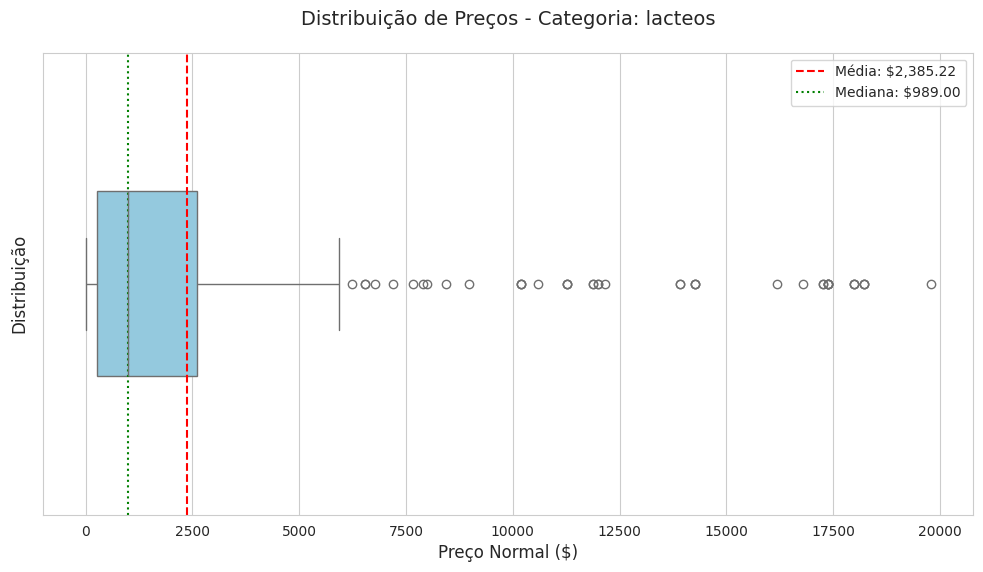

In [15]:
#Seu código aqui
# Identificar a categoria com maior desvio padrão
categoria_maior_desvio = df.groupby('Categoria')['Preco_Normal'].std().idxmax()

# Filtrar os dados para a categoria selecionada
dados_categoria = df[df['Categoria'] == categoria_maior_desvio]

# Configurações do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar o boxplot
boxplot = sns.boxplot(
    x='Preco_Normal',
    data=dados_categoria,
    color='skyblue',
    width=0.4
)

# Adicionar título e labels
plt.title(f'Distribuição de Preços - Categoria: {categoria_maior_desvio}', fontsize=14, pad=20)
plt.xlabel('Preço Normal ($)', fontsize=12)
plt.ylabel('Distribuição', fontsize=12)

# Adicionar linhas de referência para média e mediana
media = dados_categoria['Preco_Normal'].mean()
mediana = dados_categoria['Preco_Normal'].median()

plt.axvline(media, color='red', linestyle='--', label=f'Média: ${media:,.2f}')
plt.axvline(mediana, color='green', linestyle=':', label=f'Mediana: ${mediana:,.2f}')

# Mostrar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

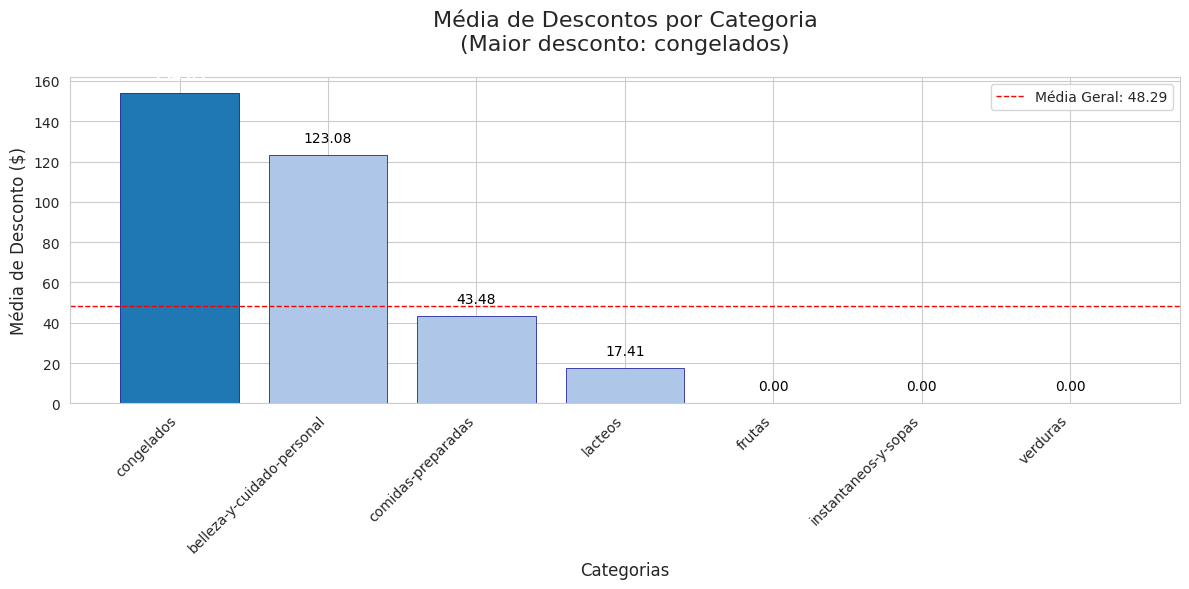

In [17]:
# Seu código aqui
# Calcular a média de descontos por categoria
media_descontos = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)

# Identificar a categoria com maior desconto médio
categoria_destaque = media_descontos.idxmax()

# Configurações do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Criar lista de cores com destaque para a categoria líder
cores = ['#1f77b4' if cat == categoria_destaque else '#aec7e8' for cat in media_descontos.index]

# Criar o gráfico de barras
bars = plt.bar(
    x=media_descontos.index,
    height=media_descontos.values,
    color=cores,
    edgecolor='darkblue',
    linewidth=0.5
)

# Adicionar título e labels com destaque
plt.title(f'Média de Descontos por Categoria\n(Maior desconto: {categoria_destaque})',
          fontsize=16, pad=20)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Média de Desconto ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar os valores nas barras com formatação especial para a categoria destaque
for bar in bars:
    height = bar.get_height()
    cor_texto = 'white' if bar.get_facecolor() == (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0) else 'black'
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 5,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color=cor_texto,
        weight='bold' if cor_texto == 'white' else 'normal'
    )

# Adicionar linha de referência para a média geral
plt.axhline(y=media_descontos.mean(), color='red', linestyle='--',
            linewidth=1, label=f'Média Geral: {media_descontos.mean():.2f}')
plt.legend()

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [33]:
## 1. Preparação dos Dados Corrigida
# Agregação completa
df_analise = (
    df[df['Desconto'] > 0]
    .groupby(['Categoria', 'Marca'])
    .agg(
        Media_Desconto=('Desconto', 'mean'),
        Qtd_Produtos=('Desconto', 'count'),
        Desconto_Max=('Desconto', 'max'),
        Desconto_Min=('Desconto', 'min')
    )
    .reset_index()
    .sort_values('Media_Desconto', ascending=False)
)

# Calcular estatísticas por categoria
df_analise['Participacao_Categoria'] = (
    df_analise.groupby('Categoria')['Media_Desconto']
    .transform(lambda x: x / x.sum() * 100)
)

# Classificar marcas por desempenho (correção aplicada aqui)
conditions = [
    df_analise['Media_Desconto'] > df_analise.groupby('Categoria')['Media_Desconto'].transform('mean') + df_analise.groupby('Categoria')['Media_Desconto'].transform('std'),
    df_analise['Media_Desconto'] < df_analise.groupby('Categoria')['Media_Desconto'].transform('mean') - df_analise.groupby('Categoria')['Media_Desconto'].transform('std')
]
choices = ['Acima', 'Abaixo']
df_analise['Desempenho'] = np.select(conditions, choices, default='Médio')

## 2. Visualização Interativa Completa
fig = make_subplots(
    rows=2, cols=2,
    specs=[
        [{"type": "treemap", "colspan": 2}, None],
        [{"type": "bar"}, {"type": "box"}]
    ],
    subplot_titles=(
        'Distribuição de Descontos por Categoria e Marca',
        'Top 10 Marcas com Maiores Descontos Médios',
        'Distribuição de Descontos por Categoria'
    ),
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

# Gráfico 1: Treemap Interativo
fig.add_trace(
    px.treemap(
        df_analise,
        path=['Categoria', 'Marca', 'Desempenho'],
        values='Qtd_Produtos',
        color='Media_Desconto',
        color_continuous_scale='Portland',
        hover_data={
            'Media_Desconto': ':.2f',
            'Qtd_Produtos': True,
            'Participacao_Categoria': ':.1f%',
            'Desconto_Max': ':.2f',
            'Desconto_Min': ':.2f'
        }
    ).data[0],
    row=1, col=1
)

# Gráfico 2: Top Marcas
top_marcas = df_analise.nlargest(10, 'Media_Desconto')
fig.add_trace(
    go.Bar(
        x=top_marcas['Marca'],
        y=top_marcas['Media_Desconto'],
        text=top_marcas['Media_Desconto'].round(2),
        textposition='auto',
        marker_color=px.colors.sequential.Inferno,
        hovertext=[
            f"Categoria: {row['Categoria']}<br>Produtos: {row['Qtd_Produtos']}<br>Máx: {row['Desconto_Max']:.2f}"
            for _, row in top_marcas.iterrows()
        ],
        name='Top Marcas'
    ),
    row=2, col=1
)

# Gráfico 3: Boxplot por Categoria
fig.add_trace(
    go.Box(
        x=df_analise['Categoria'],
        y=df_analise['Media_Desconto'],
        boxpoints='all',
        jitter=0.3,
        pointpos=0,
        marker_color='rgba(93, 164, 214, 0.5)',
        line_color='rgba(93, 164, 214, 1)',
        name='Distribuição'
    ),
    row=2, col=2
)

## 3. Atualizações de Layout Avançadas
fig.update_layout(
    height=1000,
    width=1200,
    title_text="<b>Análise Completa de Estratégias de Desconto</b>",
    title_x=0.5,
    title_font_size=24,
    showlegend=False,
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    coloraxis_colorbar=dict(
        title="Média de<br>Desconto",
        thickness=15,
        len=0.75,
        yanchor='middle',
        y=0.5
    ),
    margin=dict(t=100, b=50, l=50, r=50)
)

# Atualizações específicas por gráfico
fig.update_xaxes(title_text="Marcas", row=2, col=1, tickangle=45)
fig.update_yaxes(title_text="Média de Desconto", row=2, col=1)
fig.update_xaxes(title_text="Categorias", row=2, col=2)
fig.update_yaxes(title_text="Variação de Descontos", row=2, col=2)

# Melhorar o treemap
fig.update_traces(
    texttemplate='<b>%{label}</b><br>%{customdata[0]:.2f}',
    hovertemplate=(
        '<b>%{label}</b><br><br>'
        'Média Desconto: %{color:.2f}<br>'
        'Nº Produtos: %{customdata[1]}<br>'
        'Participação: %{customdata[2]:.1f}%<br>'
        'Máximo: %{customdata[3]:.2f}<br>'
        'Mínimo: %{customdata[4]:.2f}'
        '<extra></extra>'
    ),
    marker_line_width=0.5,
    selector=dict(type='treemap')
)

fig.show()